In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Gabung semua group menjadi 1 tabel data
groups = []

for i in range(1, 6):
    filename = f"FINAL FOOD DATASET/FOOD-DATA-GROUP{i}.csv"
    df = pd.read_csv(filename).drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
    groups.append(df)

group1, group2, group3, group4, group5 = groups

data = pd.concat(groups)
data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


# Macronutrients Analysis

In [14]:
macronutrients = ["Carbohydrates", "Protein", "Fat"]
def plot_macronutrients(data, group_name):
    plt.figure(figsize=(12, 6))
    for macronutrient in macronutrients:
        sns.kdeplot(data[macronutrient], label=macronutrient)
    plt.title(f"Distribution of Macronutrients - {group_name}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

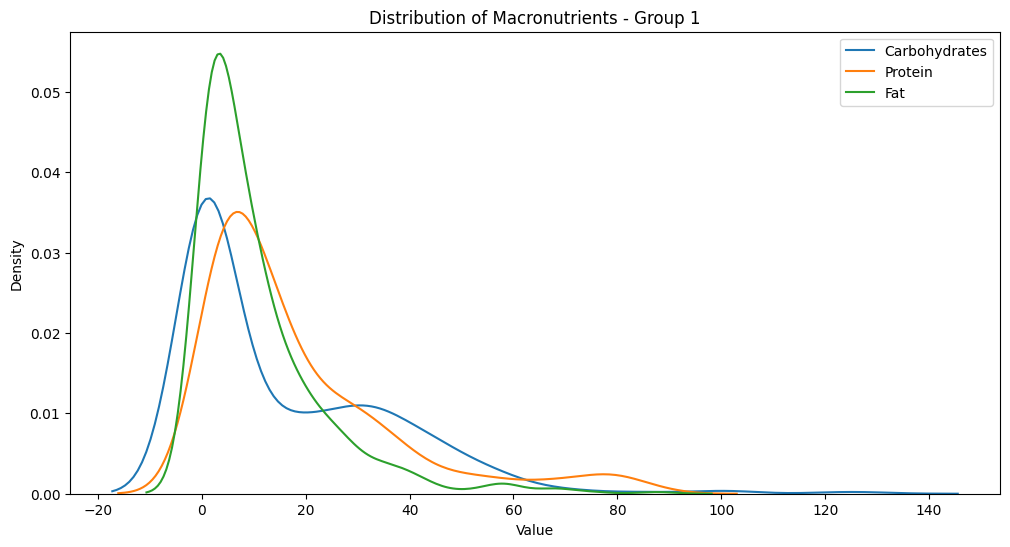

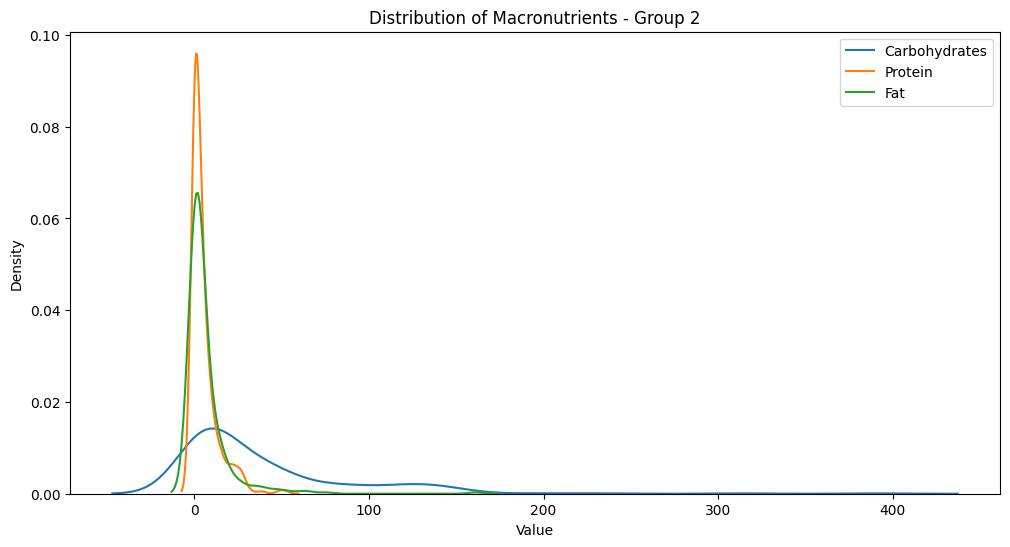

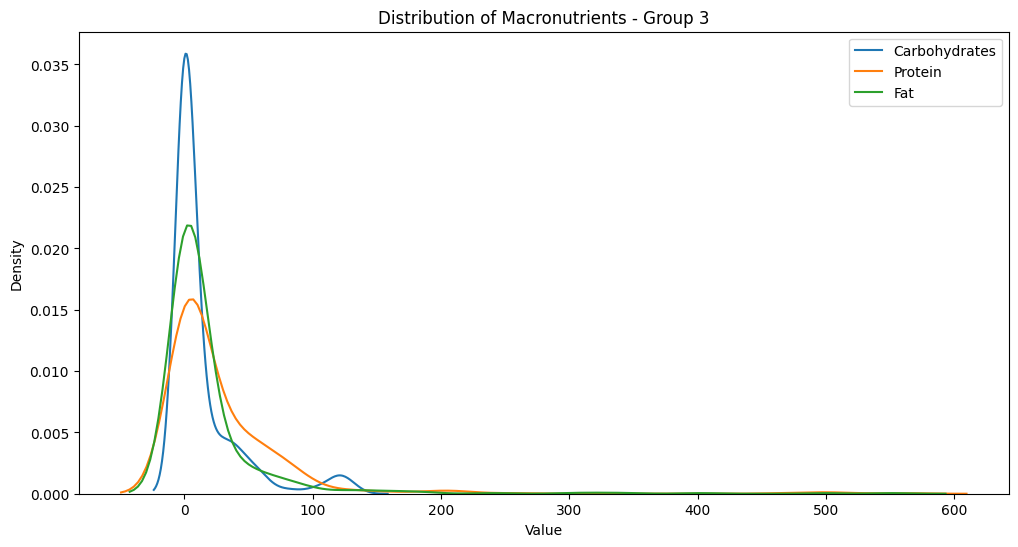

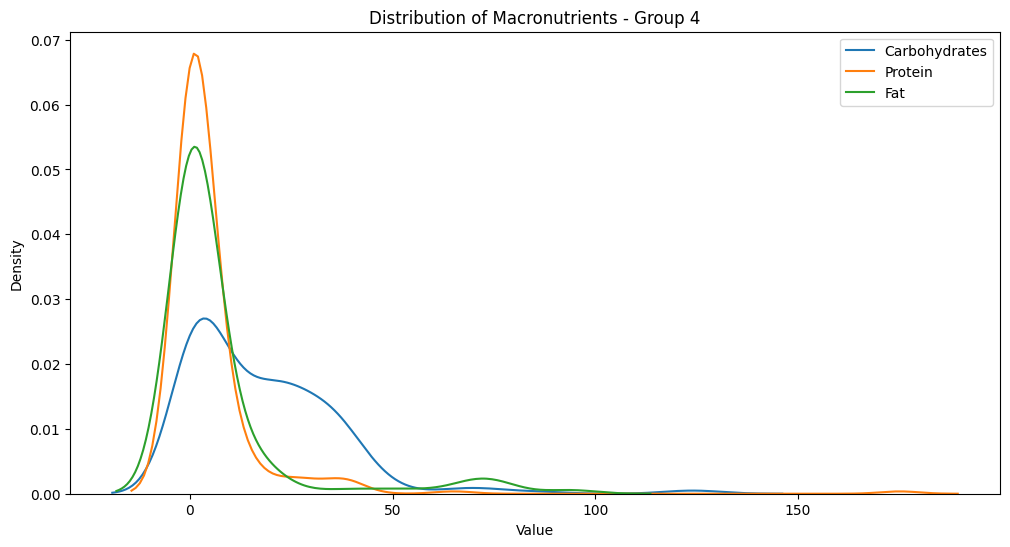

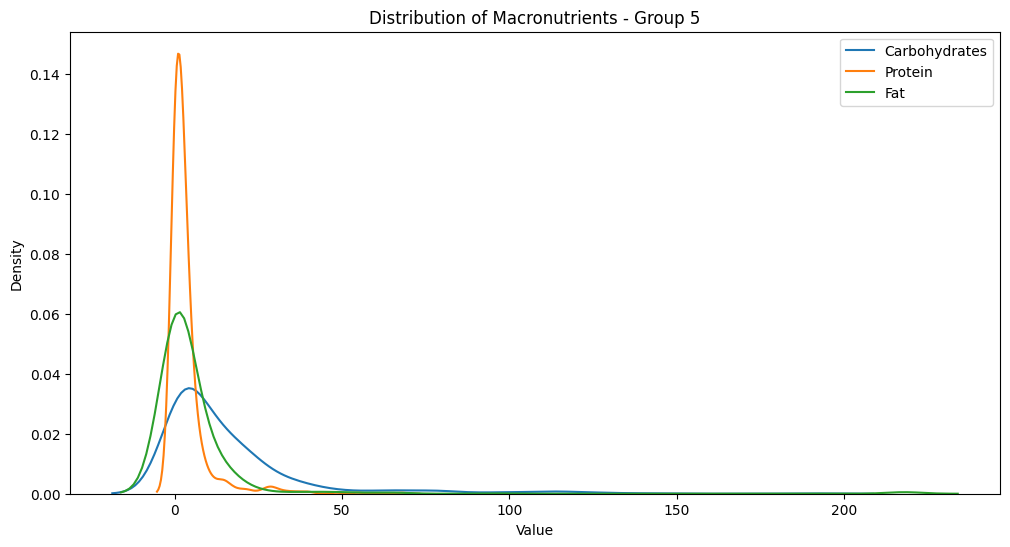

In [15]:
# Analisa distribusi macronutrients menggunakan kde plot
plot_macronutrients(group1, "Group 1")
plot_macronutrients(group2, "Group 2")
plot_macronutrients(group3, "Group 3")
plot_macronutrients(group4, "Group 4")
plot_macronutrients(group5, "Group 5")

Fat category

In [16]:
from lightgbm import LGBMClassifier as Lgbm

In [22]:
# Membuat kolom 'Fats category'
def categorize_fats(fats):
    if fats < 5:
        return 'Low fats'
    elif 5 <= fats <= 15:
        return 'Moderate fats'
    else:
        return 'High fats'

# Menambahkan kolom 'Fats category' ke dataframe
data['Fats category'] = data['Fat'].apply(categorize_fats)

# Menampilkan 5 baris pertama dari data untuk memverifikasi kolom baru
data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Fats category
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,Moderate fats
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,High fats
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Low fats
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Low fats
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Low fats
